In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_personas = 15
data = {
    'horas_sueño': np.random.uniform(5, 9, n_personas),
    'cafes_por_día': np.random.randint(0, 6, n_personas),
    'uso_pantalla_hs': np.random.uniform(2, 10, n_personas),
    'min_ejercicio': np.random.uniform(0, 60, n_personas),
}

In [3]:
data['nivel_concentración'] = (
    0.5 * data['horas_sueño'] +
    0.2 * data['min_ejercicio'] -
    0.3 * data['uso_pantalla_hs'] +
    np.random.normal(0, 1, n_personas) # Ruido aleatorio
)

df = pd.DataFrame(data)

In [4]:
df

,horas_sueño,cafes_por_día,uso_pantalla_hs,min_ejercicio,nivel_concentración
0,6.468366,4,4.794211,50.754178,13.169665
1,7.548808,1,6.086342,23.019520,7.007672
2,7.661665,2,9.386231,51.347314,9.787317
3,6.885838,3,8.692291,11.976355,3.415729
4,6.765621,3,2.256446,10.873854,5.745019
5,8.292908,2,5.236331,19.553067,8.394379
6,7.213510,2,7.062658,4.271805,2.603030
7,6.436579,5,8.625202,50.132586,11.088413
8,7.424412,2,7.028327,10.892732,3.858731
9,6.701798,2,4.664400,40.650195,11.597923


In [5]:
correlaciones=df.corr() #method='pearson' lineal
correlaciones

,horas_sueño,cafes_por_día,uso_pantalla_hs,min_ejercicio,nivel_concentración
horas_sueño,1.000000,-0.139636,0.538207,-0.113470,-0.009692
cafes_por_día,-0.139636,1.000000,0.113826,0.095279,0.046824
uso_pantalla_hs,0.538207,0.113826,1.000000,0.004951,-0.165677
min_ejercicio,-0.113470,0.095279,0.004951,1.000000,0.940151
nivel_concentración,-0.009692,0.046824,-0.165677,0.940151,1.000000


In [6]:
correlaciones_nl=df.corr(method='spearman') #method='spearman' no lineal
correlaciones_nl

,horas_sueño,cafes_por_día,uso_pantalla_hs,min_ejercicio,nivel_concentración
horas_sueño,1.000000,-0.280840,0.614286,-0.146429,-0.164286
cafes_por_día,-0.280840,1.000000,0.040382,-0.031204,0.027533
uso_pantalla_hs,0.614286,0.040382,1.000000,0.032143,-0.167857
min_ejercicio,-0.146429,-0.031204,0.032143,1.000000,0.928571
nivel_concentración,-0.164286,0.027533,-0.167857,0.928571,1.000000


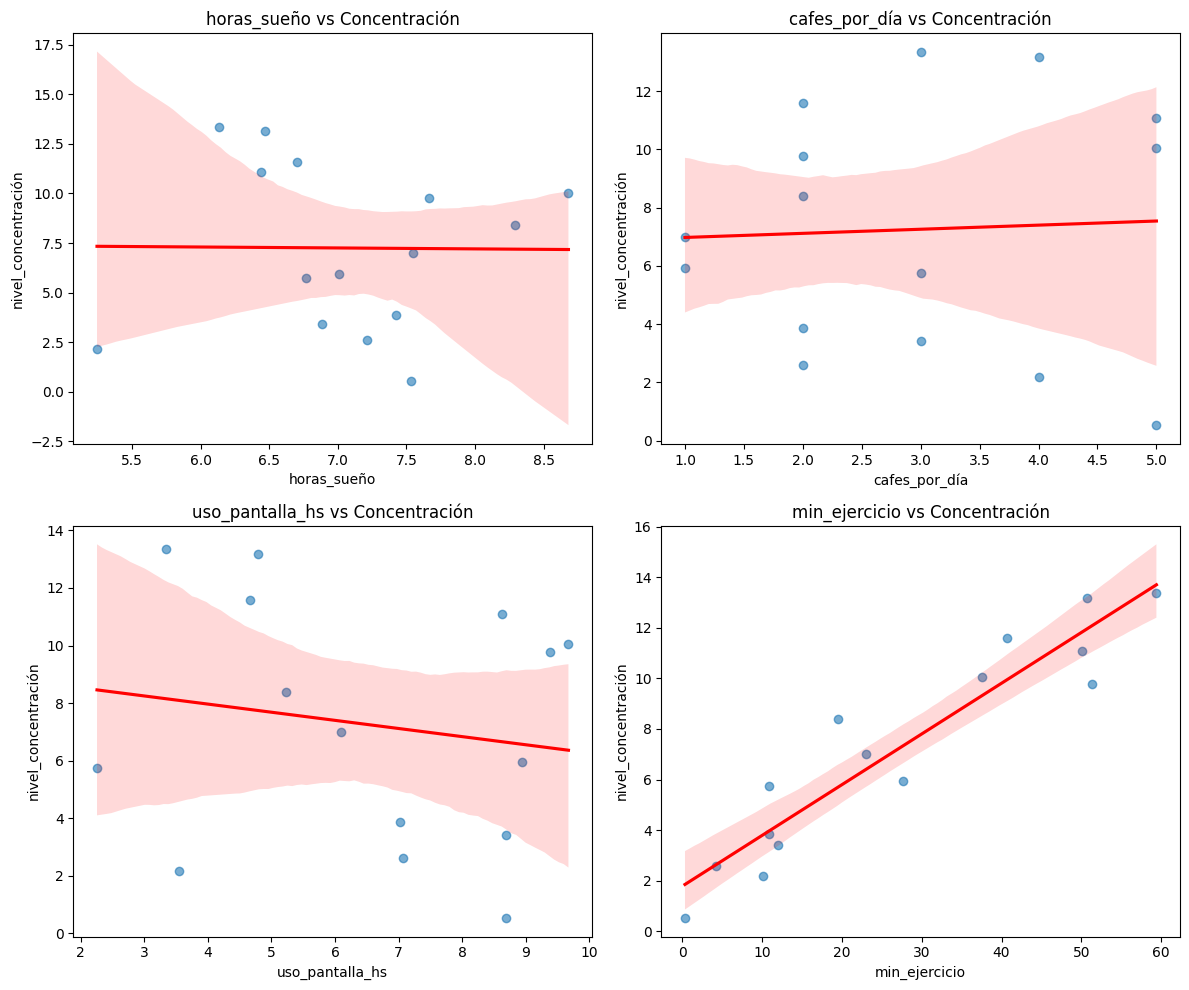

In [8]:
# 2. Representar gráficamente (Scatterplots)
variables_predictoras = ['horas_sueño', 'cafes_por_día', 'uso_pantalla_hs', 'min_ejercicio']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(variables_predictoras):
    sns.regplot(ax=axes[i], x=df[var], y=df['nivel_concentración'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    axes[i].set_title(f'{var} vs Concentración')

plt.tight_layout()
plt.show()

In [12]:
correlaciones_nc = df.corr()['nivel_concentración'].sort_values(ascending=False)
correlaciones_nc

,nivel_concentración
nivel_concentración,1.000000
min_ejercicio,0.940151
cafes_por_día,0.046824
horas_sueño,-0.009692
uso_pantalla_hs,-0.165677


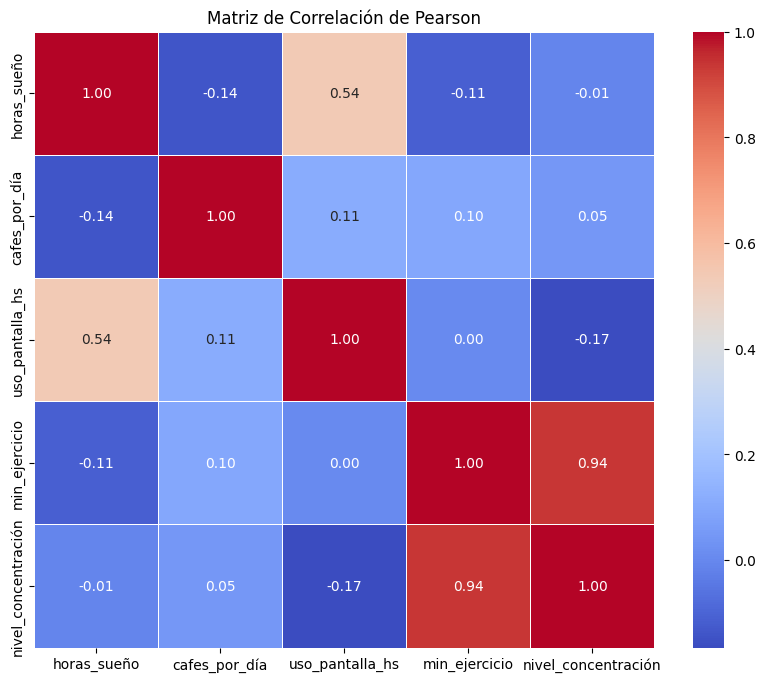

In [9]:
# visualizar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

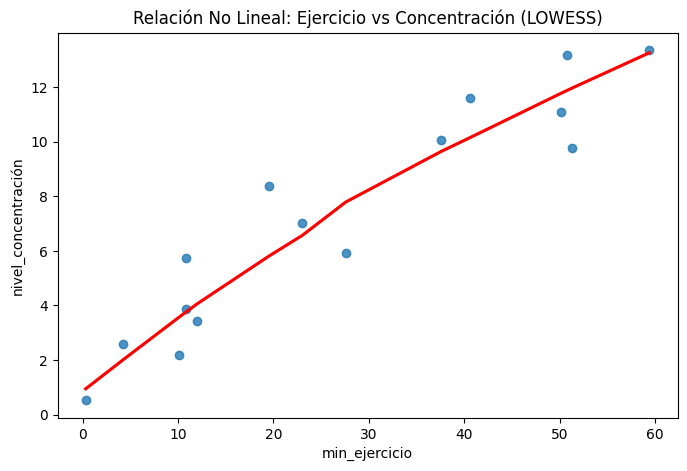

In [10]:
# --- PASO 4: Identificar relaciones no lineales ---
# Graficamos min_ejercicio vs concentración (que definimos como logarítmica)
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='min_ejercicio', y='nivel_concentración', lowess=True, line_kws={'color': 'red'})
plt.title('Relación No Lineal: Ejercicio vs Concentración (LOWESS)')
plt.show()

In [14]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 12.9 MB/s eta 0:00:00


In [15]:
import pingouin as pg

In [16]:
parcial=pg.partial_corr(data=df, x='horas_sueño', y='nivel_concentración', covar='uso_pantalla_hs')
parcial

,n,r,CI95%,p-val
pearson,15,0.09562,"[-0.46, 0.6]",0.745054


In [18]:
parcial2=pg.partial_corr(data=df, x='horas_sueño', y='uso_pantalla_hs', covar='nivel_concentración')
parcial2

,n,r,CI95%,p-val
pearson,15,0.544146,"[0.02, 0.83]",0.044258


In [19]:
!pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=856)

# data (as pandas dataframes)
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

# metadata
print(higher_education_students_performance_evaluation.metadata)

# variable information
print(higher_education_students_performance_evaluation.variables)


{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51G82', 'creators': ['Nevriye Yilmaz', 'Boran Şekeroğlu'], 'intro_

In [27]:
df_edu=pd.DataFrame(X)
df_edu

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,2,1,2,1,3,3,9
141,1,1,2,4,2,2,2,1,4,2,...,2,1,1,3,2,2,1,5,3,9
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,3,3,2,1,4,3,9
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,2,1,5,3,9


In [28]:
df_edu['GRADE']=y
df_edu

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4



--- Información General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 32 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Student Age                                                        145 non-null    int64
 1   Sex                                                                145 non-null    int64
 2   Graduated high-school type                                         145 non-null    int64
 3   Scholarship type                                                   145 non-null    int64
 4   Additional work                                                    145 non-null    int64
 5   Regular artistic or sports activity                                145 non-null    int64
 6   Do you have a partner                                              145 non-null    int64
 7   Total salary if

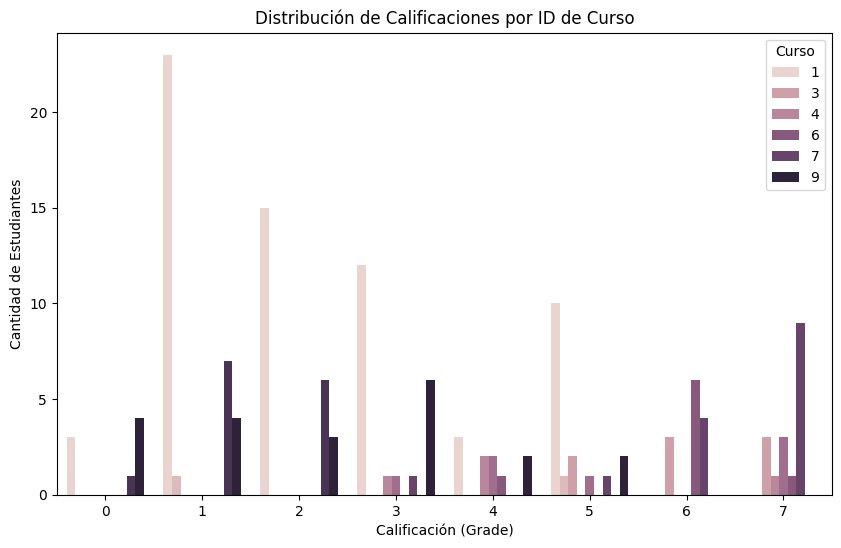


--- Correlación de variables con la nota final ---
GRADE                                                                1.000000
Sex                                                                  0.335533
Cumulative grade point average in the last semester (/4.00)          0.315493
Expected Cumulative grade point average in the graduation (/4.00)    0.248588
Reading frequency (non-scientific books/journals)                    0.195617
Name: GRADE, dtype: float64


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el archivo desde el repositorio o subirlo como csv
# df_edu = pd.read_csv('DATA (1) 2.csv')

# 2. Mostrar la estructura
print("\n--- Información General ---")
print(df_edu.info())

# 3. Resumen estadístico de las calificaciones
print("\n--- Estadísticas de la columna GRADE ---")
print(df_edu['GRADE'].describe())

# 4. Visualización: Distribución de calificaciones por Curso
plt.figure(figsize=(10, 6))
sns.countplot(data=df_edu, x='GRADE', hue='Course ID')
plt.title('Distribución de Calificaciones por ID de Curso')
plt.xlabel('Calificación (Grade)')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Curso')
plt.show()

# 5. Correlación simple (ejemplo entre algunas variables y la nota)
# Seleccionamos las últimas columnas para ver qué influye en GRADE
correlation = df_edu.corr()['GRADE'].sort_values(ascending=False)
print("\n--- Correlación de variables con la nota final ---")
print(correlation.head(5))